### **Analyzing the trends in individuals pursuing higher education internationally and identifying the socioeconomic factors that correlate with these changes.**

Team 3: Brynn Hare, Nora Manolescu, Kaitlyn Clements, Kyle Johnson, and Sam Muehlebach





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''Required Imports'''
import pandas as pd
import numpy as np
import altair as alt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
'''Function for Converting geoUnit to Country Name'''

# Mapping for our selected countries
country_code_to_name = {
    'USA': 'United States',
    'JPN': 'Japan',
    'DEU': 'Germany',
    'ARG': 'Argentina',
    'KEN': 'Kenya'
}

# HOW TO USE:
# Copy & Paste this, replace df_name and column name as needed
'''
df_name.loc[:, 'geoUnit'] = df_name['geoUnit'].map(country_code_to_name)

'''

"\ndf_name.loc[:, 'geoUnit'] = df_name['geoUnit'].map(country_code_to_name)\n\n"

In [4]:
''' Gross Enrollment '''
# Read and display
file_path1 = '/content/data/gross_enrollment.csv'
enrollment_df = pd.read_csv(file_path1)

# Drop columns with all NaNs if they're not needed
enrollment_df = enrollment_df.drop(columns=['qualifier', 'magnitude'], errors='ignore')

# enrollment_df

# Filter for selected countries and years
enroll_subset = enrollment_df[
    (enrollment_df['geoUnit'].isin(['USA', 'JPN', 'DEU', 'ARG', 'KEN'])) &
    (enrollment_df['year'].between(2000, 2019))
]

alt.Chart(enroll_subset).mark_line(point=True).encode(
    x=alt.X('year:O', title='Year'),
    y=alt.Y('value:Q', title='Enrollment Rate (%)', scale=alt.Scale(zero=False)),
    color=alt.Color('geoUnit:N', title='Country'),
    tooltip=['geoUnit', 'year', 'value']
).properties(
    title='Gross Enrollment Rate for Tertiary Education (2000–2019)'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data/gross_enrollment.csv'

In [ ]:
''' Gross Attendance'''
file_path2 = '/content/data/gross_attendance.csv'
attendance_df = pd.read_csv(file_path2)

# Drop columns with all NaNs if they're not needed
attendance_df = attendance_df.drop(columns=['qualifier', 'magnitude'], errors='ignore')

# attendance_df

# Filter for selected countries and years
attend_subset = attendance_df[
    (attendance_df['geoUnit'].isin(['USA', 'JPN', 'DEU', 'ARG', 'KEN'])) &
    (attendance_df['year'].between(2000, 2019))
]

# Plot
alt.Chart(attend_subset).mark_line(point=True).encode(
    x=alt.X('year:O', title='Year'),
    y=alt.Y('value:Q', title='Attendance Rate (%)', scale=alt.Scale(zero=False)),
    color=alt.Color('geoUnit:N', title='Country'),
    tooltip=['geoUnit', 'year', 'value']
).properties(
    title='Gross Attendance Rate for Tertiary Education (2000–2019)'
)



alt.Chart(...)

In [ ]:
'''Poverty Rates Clustering'''
poverty_rates_data = pd.read_csv('/content/data/poverty_data.csv')
columns = ['country_name', 'reporting_year', 'poverty_line', 'headcount', 'poverty_gap', 'region_name'] #selecting the appropriate columns from the dataset
poverty_rates_data = poverty_rates_data[(poverty_rates_data['reporting_year'] == 2010)] #only using information from the year 2010
poverty_rates_data = poverty_rates_data.filter(items=columns)
poverty_rates_data['poverty_rate_percent'] = poverty_rates_data['headcount'] * 100 #calculating the poverty rate percentage using the headcount column
features = poverty_rates_data[['poverty_gap', 'poverty_rate_percent']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0) #clustering with 3 clusters
clusters = kmeans.fit_predict(features_scaled)

poverty_rates_data['cluster'] = clusters
chart = alt.Chart(poverty_rates_data).mark_point().encode( #creating the graph
    x=alt.X('poverty_rate_percent:Q').title('Poverty Rate (%)'), #the poverty rate percentage is the x axis
    y=alt.Y('poverty_gap:Q').title('Poverty Gap'), #the poverty gap is the y axis
    shape=alt.Shape('cluster:N').title('Cluster'), #make the clusters different shapes
    color=alt.Color('region_name:N').title('Region'), #make the regions different colors
    tooltip=['country_name', 'reporting_year', 'poverty_line', 'poverty_rate_percent']
).properties(
    title='Poverty Gap vs Poverty Rate in 2010' #get the title of the graph
)

chart

alt.Chart(...)

In [ ]:
'''Poverty Rates Table'''
poverty_rates = pd.read_csv('/content/data/poverty_data.csv')
columns = ['country_name', 'reporting_year', 'poverty_line', 'headcount'] #filter the dataset to only include these columns
poverty_rates = poverty_rates[(poverty_rates['country_name']=='United States')| #we only want information for the united states, germany, japan, argentina, and kenya
                              (poverty_rates['country_name']=='Germany')|
                              (poverty_rates['country_name']=='Japan')|
                              (poverty_rates['country_name']=='Argentina')|
                              (poverty_rates['country_name']=='Kenya')]
poverty_rates = poverty_rates[(poverty_rates['reporting_year'] == 2000) | #we only want the years 2000-2019
                              (poverty_rates['reporting_year'] == 2001) |
                              (poverty_rates['reporting_year'] == 2002) |
                              (poverty_rates['reporting_year'] == 2003) |
                              (poverty_rates['reporting_year'] == 2004) |
                              (poverty_rates['reporting_year'] == 2005) |
                              (poverty_rates['reporting_year'] == 2006) |
                              (poverty_rates['reporting_year'] == 2007) |
                              (poverty_rates['reporting_year'] == 2008) |
                              (poverty_rates['reporting_year'] == 2009) |
                              (poverty_rates['reporting_year'] == 2010) |
                              (poverty_rates['reporting_year'] == 2011) |
                              (poverty_rates['reporting_year'] == 2012) |
                              (poverty_rates['reporting_year'] == 2013) |
                              (poverty_rates['reporting_year'] == 2014) |
                              (poverty_rates['reporting_year'] == 2015) |
                              (poverty_rates['reporting_year'] == 2016) |
                              (poverty_rates['reporting_year'] == 2017) |
                              (poverty_rates['reporting_year'] == 2018) |
                              (poverty_rates['reporting_year'] == 2019)]
poverty_rates = poverty_rates.filter(items=columns)
poverty_rates['poverty_rate_percent'] = poverty_rates['headcount'] * 100 #calculating the poverty rate percent
poverty_rates

,country_name,reporting_year,poverty_line,headcount,poverty_rate_percent
32,Argentina,2000,6.9,0.273513,27.351326
33,Argentina,2001,6.9,0.314594,31.459385
34,Argentina,2002,6.9,0.454979,45.497900
35,Argentina,2003,6.9,0.299479,29.947883
36,Argentina,2004,6.9,0.252259,25.225871
...,...,...,...,...,...
2378,United States,2015,6.9,0.022485,2.248539
2379,United States,2016,6.9,0.019974,1.997358
2380,United States,2017,6.9,0.019967,1.996694
2381,United States,2018,6.9,0.017497,1.749701


In [ ]:
'''Poverty Rates Chart'''
poverty_rates_chart_point = alt.Chart(poverty_rates).mark_circle().encode( #creating the points for the graph
    x=alt.X('reporting_year:O').title('Year').scale(zero=False),
    y=alt.Y('poverty_rate_percent:Q').title('Poverty Rate (%)'),
    color=alt.Color('country_name:N').title('Country')
)
poverty_rates_chart_line = alt.Chart(poverty_rates).mark_line().encode( #creating the line for the graph
    x=alt.X('reporting_year:O').title('Year').scale(zero=False),
    y=alt.Y('poverty_rate_percent:Q').title('Poverty Rate (%)'),
    color=alt.Color('country_name:N').title('Country')
).properties(title='Poverty Rate by Country (2000-2019)')
poverty_rates_chart = poverty_rates_chart_point + poverty_rates_chart_line #combining the lines and dots
poverty_rates_chart

alt.LayerChart(...)

In [ ]:
'''Removing Kenya and Germany from dataset
      removed Kenya because of the outlier of data'''
poverty_rates_adjusted = poverty_rates[(poverty_rates['country_name']=='United States')|
                                       (poverty_rates['country_name']=='Germany')|
                                       (poverty_rates['country_name']=='Japan')|
                                       (poverty_rates['country_name']=='Argentina')]

poverty_rates_adjusted_chart = alt.Chart(poverty_rates_adjusted).mark_line().encode(
    x=alt.X('reporting_year:O').title('Year').scale(zero=False),
    y=alt.Y('poverty_rate_percent:Q').title('Poverty Rate (%)'),
    color=alt.Color('country_name:N').title('Country')
)
poverty_rates_adjusted_chart

alt.Chart(...)

In [ ]:
'''Average Age of Higher Education Completion Table'''
ages_data = pd.read_csv('/content/data/school_age_completion.csv')
columns = ['country', 'year', 'agefrom', 'ageto', 'lsc', 'lhc']
ages_data = ages_data[(ages_data['country']=='USA')|
                      (ages_data['country']=='Japan')|
                      (ages_data['country']=='Germany')|
                      (ages_data['country']=='Kenya')|
                      (ages_data['country']=='Argentina')]
ages_data = ages_data[(ages_data['year']==2000)|
                      (ages_data['year']==2001)|
                      (ages_data['year']==2002)|
                      (ages_data['year']==2003)|
                      (ages_data['year']==2004)|
                      (ages_data['year']==2005)|
                      (ages_data['year']==2006)|
                      (ages_data['year']==2007)|
                      (ages_data['year']==2008)|
                      (ages_data['year']==2009)|
                      (ages_data['year']==2010)|
                      (ages_data['year']==2011)|
                      (ages_data['year']==2012)|
                      (ages_data['year']==2013)|
                      (ages_data['year']==2014)|
                      (ages_data['year']==2015)|
                      (ages_data['year']==2016)|
                      (ages_data['year']==2017)|
                      (ages_data['year']==2018)|
                      (ages_data['year']==2019)]
ages_data['country'] = ages_data['country'].replace({'USA': 'United States'})
ages_data = ages_data.filter(items=columns)
ages_data = ages_data.rename(columns={
                              'lsc': 'percent_completed_secondary_school',
                              'lhc': 'percent_completed_tertiary_school',
                              'agefrom': 'ages'
})

ages_data['ages'] = ages_data['ages'].astype(str) + '-' + ages_data['ageto'].astype(str)
ages_data.loc[ages_data['ages'] == '75-999', 'ages'] = '75-99+'
ages_data.drop(ages_data[ages_data['ages'] == '25-999'].index, inplace=True)
ages_data.drop(ages_data[ages_data['ages'] == '15-999'].index, inplace=True)
ages_data.drop('ageto', axis=1, inplace=True)
ages_data

,country,year,ages,percent_completed_secondary_school,percent_completed_tertiary_school
2490,Kenya,2000,15-19,2.67,0.11
2491,Kenya,2000,20-24,9.03,3.45
2492,Kenya,2000,25-29,8.67,4.03
2493,Kenya,2000,30-34,7.04,4.16
2494,Kenya,2000,35-39,6.42,3.89
...,...,...,...,...,...
24758,Germany,2010,55-59,57.79,16.68
24759,Germany,2010,60-64,57.79,17.04
24760,Germany,2010,65-69,54.55,13.56
24761,Germany,2010,70-74,54.55,13.54


In [ ]:
'''Tertiary Chart; these are only from year 2010'''
tertiary_chart = alt.Chart(ages_data).mark_bar().encode(
    x=alt.X('ages:N', title='Age Range'),
    y=alt.Y('percent_completed_tertiary_school:Q', title='Completed Tertiary (%)'),
    color=alt.Color('country:N', title='Country'),
    tooltip=['country', 'year', 'ages', 'percent_completed_tertiary_school']
).facet(
    column=alt.Column('country:N', title='Percentages of people completing a tertiary education by age group')
)
tertiary_chart

alt.FacetChart(...)

In [ ]:
edu_gdp_df = pd.read_csv("data/Government%GDP.csv")

edu_gdp_long = edu_gdp_df.melt(id_vars='geoUnit', var_name='Year', value_name='Percent_GDP')
line = alt.Chart(edu_gdp_long).mark_line().encode(
    x='Year:O',
    y='Percent_GDP:Q',
    color='geoUnit:N'
)

points = alt.Chart(edu_gdp_long).mark_point().encode(
    x='Year:O',
    y='Percent_GDP:Q',
    color='geoUnit:N',
    tooltip=['geoUnit', 'Year', 'Percent_GDP']
)

chart = (line + points).properties(
    title="Government Spending on Education (% of GDP) by Country (2010–2015)",
    width=700,
    height=400
)

chart

alt.LayerChart(...)

In [ ]:
grad_rate_df = pd.read_csv("data/Graduation_rate.csv")
grad_rate_long = grad_rate_df.melt(id_vars='geoUnit', var_name='Year', value_name='Graduation_Rate')

grad_rate_long = grad_rate_long.dropna(subset=['Graduation_Rate'])

chart = (
    alt.Chart(grad_rate_long).mark_line().encode(
        x='Year:O',
        y='Graduation_Rate:Q',
        color='geoUnit:N'
    ) +
    alt.Chart(grad_rate_long).mark_point().encode(
        x='Year:O',
        y='Graduation_Rate:Q',
        color='geoUnit:N',
        tooltip=['geoUnit', 'Year', 'Graduation_Rate']
    )
).properties(
    title="Graduation Rate by Country (2000–2022)",
    width=700,
    height=400
).interactive()

chart

alt.LayerChart(...)

In [ ]:
df = pd.read_excel("data/Updated_Education_GDP_Data.xlsx")

melted_df = df.melt(id_vars='Country', var_name='Year', value_name='Value')

chart = alt.Chart(melted_df).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Value:Q', title='% of GDP Per Capita on Education'),
    color='Country:N',
    tooltip=['Country', 'Year', 'Value']
).properties(
    title='% of GDP Per Capita Spent on Tertiary Education (2010–2020)',
    width=700,
    height=400
)

chart


alt.Chart(...)

In [ ]:
# --- IMPORTS AND SETTINGS ---
import pandas as pd
import numpy as np
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

alt.data_transformers.disable_max_rows()

# --- LOAD DATA ---
gdp_df = pd.read_csv("data/data_second-ed_comp.csv")
wb_education_df = pd.read_csv("data/data_secondary_education_2.csv", skiprows=4)
internet_df = pd.read_csv("data/data_internet_access.csv", skiprows=4)

# --- CLEAN INTERNET ACCESS DATA ---
internet_long = internet_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Internet Access (%)"
)
internet_long["Year"] = pd.to_numeric(internet_long["Year"], errors="coerce")
internet_long = internet_long.dropna(subset=["Year", "Internet Access (%)"])
internet_long["Year"] = internet_long["Year"].astype(int)

# --- SELECT COUNTRIES AND YEARS ---
countries = ['USA', 'JPN', 'DEU', 'ARG', 'KEN']
years = list(range(2010, 2020))

gdp_filtered = gdp_df[
    gdp_df['geoUnit'].isin(countries) &
    gdp_df['year'].isin(years)
].rename(columns={
    'geoUnit': 'Country Code',
    'year': 'Year',
    'value': 'Second Ed Completion (%)'
})[['Country Code', 'Year', 'Second Ed Completion (%)']]
display(gdp_filtered)

edu_long = wb_education_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Upper Secondary Completion (%)"
)
edu_long["Year"] = pd.to_numeric(edu_long["Year"], errors="coerce")
edu_long = edu_long.dropna(subset=["Year", "Upper Secondary Completion (%)"])
edu_long["Year"] = edu_long["Year"].astype(int)

edu_filtered = edu_long[
    edu_long["Country Code"].isin(countries) &
    edu_long["Year"].isin(years)
][["Country Code", "Year", "Upper Secondary Completion (%)"]]
display(edu_filtered)

# --- MERGE SECONDARY COMPLETION ---
completion_merged = pd.merge(gdp_filtered, edu_filtered, on=["Country Code", "Year"], how="outer")
completion_merged["Second Ed Completion (%)"] = completion_merged["Second Ed Completion (%)"].fillna(completion_merged["Upper Secondary Completion (%)"])
completion_final = completion_merged.drop(columns=["Upper Secondary Completion (%)"])
display(completion_final)

# --- MERGE INTERNET ACCESS WITH EDUCATION COMPLETION ---
internet_filtered = internet_long[
    internet_long["Country Code"].isin(countries) &
    internet_long["Year"].isin(years)
][["Country Code", "Year", "Internet Access (%)"]]
display(internet_filtered)

final_df = pd.merge(internet_filtered, completion_final, on=["Country Code", "Year"], how="inner")
display(final_df)

# --- DROP MISSING VALUES ---
clean_final_df = final_df.dropna(subset=["Internet Access (%)", "Second Ed Completion (%)"])
display(clean_final_df)

# --- VISUALIZATIONS ---

# Internet Access over time (smoothed)
chart1 = alt.Chart(clean_final_df).mark_line(point=True, interpolate='monotone').encode(
    x='Year:O',
    y='Internet Access (%)',
    color='Country Code'
).properties(title='Internet Access Over Time (Smoothed)')
display(chart1)

# Secondary Education Completion over time (smoothed)
chart2 = alt.Chart(clean_final_df).mark_line(point=True, interpolate='monotone').encode(
    x='Year:O',
    y='Second Ed Completion (%)',
    color='Country Code'
).properties(title='Secondary Education Completion Over Time (Smoothed)')
display(chart2)

# Scatter plot with regression trendline
scatter = alt.Chart(clean_final_df).mark_circle(size=100).encode(
    x='Internet Access (%)',
    y='Second Ed Completion (%)',
    color='Country Code',
    tooltip=['Country Code', 'Year', 'Internet Access (%)', 'Second Ed Completion (%)']
)

regression_line = scatter.transform_regression(
    'Internet Access (%)', 'Second Ed Completion (%)'
).mark_line(color='black')

scatter_plot_with_line = (scatter + regression_line).properties(
    title='Internet Access vs Secondary Education Completion with Trendline'
)
display(scatter_plot_with_line)

# --- LINEAR REGRESSION ---
X = clean_final_df[['Internet Access (%)']]
y = clean_final_df['Second Ed Completion (%)']
model = LinearRegression().fit(X, y)

print(f"Pearson Correlation: {X.squeeze().corr(y):.4f}")
print(f"Regression Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")

# --- CLUSTERING ---
scaler = StandardScaler()
scaled = scaler.fit_transform(clean_final_df[['Internet Access (%)', 'Second Ed Completion (%)']])
kmeans = KMeans(n_clusters=3, random_state=0)
clean_final_df['Cluster'] = kmeans.fit_predict(scaled)

# Human-readable cluster labels
cluster_labels = {
    0: 'High Internet & Education',
    1: 'Moderate Internet & Education',
    2: 'Low Internet & Education'
}
clean_final_df['Cluster Label'] = clean_final_df['Cluster'].map(cluster_labels)
display(clean_final_df[['Country Code', 'Year', 'Internet Access (%)', 'Second Ed Completion (%)', 'Cluster Label']])

# Clustered scatter plot
cluster_chart = alt.Chart(clean_final_df).mark_circle(size=100).encode(
    x='Internet Access (%)',
    y='Second Ed Completion (%)',
    color='Cluster Label:N',
    tooltip=['Country Code', 'Year', 'Cluster Label']
).properties(title='Clusters Based on Internet Access and Education Completion (Labeled)')
display(cluster_chart)

# --- STATISTICAL INFERENCE (T-tests) ---

# Internet Access T-test: USA vs Kenya
usa_internet = clean_final_df[clean_final_df['Country Code'] == 'USA']['Internet Access (%)']
ken_internet = clean_final_df[clean_final_df['Country Code'] == 'KEN']['Internet Access (%)']

if not usa_internet.empty and not ken_internet.empty:
    t_stat_internet, p_val_internet = ttest_ind(usa_internet, ken_internet, equal_var=False)
    print(f"T-test (Internet Access between USA and Kenya): T-statistic = {t_stat_internet:.4f}, P-value = {p_val_internet:.4f}")
else:
    print("T-test on internet access could not be performed due to insufficient data.")

# Education Completion T-test: USA vs Kenya
usa_completion = clean_final_df[clean_final_df['Country Code'] == 'USA']['Second Ed Completion (%)']
ken_completion = clean_final_df[clean_final_df['Country Code'] == 'KEN']['Second Ed Completion (%)']

if not usa_completion.empty and not ken_completion.empty:
    t_stat_comp, p_val_comp = ttest_ind(usa_completion, ken_completion, equal_var=False)
    print(f"T-test (Secondary Education Completion between USA and Kenya): T-statistic = {t_stat_comp:.4f}, P-value = {p_val_comp:.4f}")
else:
    print("T-test on education completion could not be performed due to insufficient data.")



,Country Code,Year,Second Ed Completion (%)
18,ARG,2010,56.831020
19,ARG,2011,62.800000
20,ARG,2012,62.500000
21,ARG,2013,62.300000
22,ARG,2014,62.200000
23,ARG,2016,62.700000
24,ARG,2017,63.000000
25,ARG,2018,63.400000
26,ARG,2019,63.800000
306,DEU,2010,79.560000


,Country Code,Year,Upper Secondary Completion (%)
13355,DEU,2010,81.129997
13419,JPN,2010,80.339996
13421,KEN,2010,22.030001
13551,USA,2010,87.150002
13621,DEU,2011,81.720001
13817,USA,2011,87.589996
13887,DEU,2012,82.050003
14083,USA,2012,87.680000
14153,DEU,2013,82.309998
14349,USA,2013,88.150002


,Country Code,Year,Second Ed Completion (%)
0,ARG,2010,56.831020
1,ARG,2011,62.800000
2,ARG,2012,62.500000
3,ARG,2013,62.300000
4,ARG,2014,62.200000
5,ARG,2016,62.700000
6,ARG,2017,63.000000
7,ARG,2018,63.400000
8,ARG,2019,63.800000
9,DEU,2010,79.560000


,Country Code,Year,Internet Access (%)
13309,ARG,2010,45.0
13355,DEU,2010,82.0
13419,JPN,2010,78.2
13421,KEN,2010,7.2
13551,USA,2010,71.7
13575,ARG,2011,51.0
13621,DEU,2011,81.3
13685,JPN,2011,79.1
13687,KEN,2011,8.8
13817,USA,2011,69.7


,Country Code,Year,Internet Access (%),Second Ed Completion (%)
0,ARG,2010,45.0,56.831020
1,DEU,2010,82.0,79.560000
2,JPN,2010,78.2,80.339996
3,KEN,2010,7.2,22.030001
4,USA,2010,71.7,90.118530
5,ARG,2011,51.0,62.800000
6,DEU,2011,81.3,80.240000
7,USA,2011,69.7,87.589996
8,ARG,2012,55.8,62.500000
9,DEU,2012,82.4,77.600000


,Country Code,Year,Internet Access (%),Second Ed Completion (%)
0,ARG,2010,45.0,56.831020
1,DEU,2010,82.0,79.560000
2,JPN,2010,78.2,80.339996
3,KEN,2010,7.2,22.030001
4,USA,2010,71.7,90.118530
5,ARG,2011,51.0,62.800000
6,DEU,2011,81.3,80.240000
7,USA,2011,69.7,87.589996
8,ARG,2012,55.8,62.500000
9,DEU,2012,82.4,77.600000


alt.Chart(...)

alt.Chart(...)

alt.LayerChart(...)

Pearson Correlation: 0.8393
Regression Coefficient: 0.6408
Intercept: 29.27


,Country Code,Year,Internet Access (%),Second Ed Completion (%),Cluster Label
0,ARG,2010,45.0,56.831020,Low Internet & Education
1,DEU,2010,82.0,79.560000,High Internet & Education
2,JPN,2010,78.2,80.339996,High Internet & Education
3,KEN,2010,7.2,22.030001,Moderate Internet & Education
4,USA,2010,71.7,90.118530,High Internet & Education
5,ARG,2011,51.0,62.800000,Low Internet & Education
6,DEU,2011,81.3,80.240000,High Internet & Education
7,USA,2011,69.7,87.589996,High Internet & Education
8,ARG,2012,55.8,62.500000,Low Internet & Education
9,DEU,2012,82.4,77.600000,High Internet & Education


alt.Chart(...)

T-test (Internet Access between USA and Kenya): T-statistic = 15.3935, P-value = 0.0000
T-test (Secondary Education Completion between USA and Kenya): T-statistic = 7.3983, P-value = 0.0047


In [ ]:
"""POPULATION GROWTH - reading, cleaning, & displaying table"""
# Annual percent population growth

# Read data file with annual percent population growth
pop_growth = pd.read_csv('data/population_growth.csv')

# Rename columns
pop_growth.rename(columns={'value': 'Percent Growth'}, inplace=True)
pop_growth.rename(columns={'geoUnit': 'Country'}, inplace=True)
pop_growth.rename(columns={'year': 'Year'}, inplace=True)

# Selecting relevant columns
pop_growth = pop_growth[['Country', 'Year', 'Percent Growth']]

# Filtering the data to what we are looking at
# Countries: United States, Japan, Germany, Argentina, Kenya
# Years: 2010-2019
filtered_pop_growth = pop_growth[
    (pop_growth['Country'].isin(['USA', 'JPN', 'DEU', 'ARG', 'KEN'])) &
    (pop_growth['Year'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019]))
]

# Change geoUnit to the actual country name
filtered_pop_growth.loc[:, 'Country'] = filtered_pop_growth['Country'].map(country_code_to_name)

# Display
filtered_pop_growth

,Country,Year,Percent Growth
154,Argentina,2010,0.25558
155,Argentina,2011,1.15306
156,Argentina,2012,1.13691
157,Argentina,2013,1.11911
158,Argentina,2014,1.09946
159,Argentina,2015,1.07800
160,Argentina,2016,1.05718
161,Argentina,2017,1.03713
163,Argentina,2019,0.99340
1186,Germany,2010,-0.15320


In [ ]:
# Plot population growth for filtered countries & year range

# Create chart
chart = alt.Chart(filtered_pop_growth).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Percent Growth:Q', title='Population Growth (%)'),
    color=alt.Color('Country:N', title='Country'),
    tooltip=['Country:N', 'Percent Growth:O', 'Population Growth:Q']
).properties(
    title='Population Growth (%) by Country (2010 - 2019)',
    width=600,
    height=400
)

chart

alt.Chart(...)

In [ ]:
"""Government Expenditure as GDP % Growth 2010-2019 - reading & cleaning data"""

# Import data and clean columns
gdp_rate = pd.read_csv('data/gdp_rate.csv')
gdp_rate.rename(columns={'value': 'GDP rate'}, inplace=True)
gdp_rate = gdp_rate[['geoUnit', 'year', 'GDP rate']]
gdp_rate

,geoUnit,year,GDP rate
0,ABW,2000,4.714680
1,ABW,2001,4.798980
2,ABW,2002,4.872200
3,ABW,2004,4.356990
4,ABW,2005,4.623220
...,...,...,...
3546,ZWE,2013,5.995980
3547,ZWE,2014,6.138350
3548,ZWE,2017,5.818780
3549,ZWE,2018,2.050490


In [ ]:
# Filter countries and years
filtered_countries = gdp_rate[gdp_rate['geoUnit'].isin(['USA', 'JPN', 'DEU', 'ARG', 'KEN'])]
filtered_countries.loc[:, 'geoUnit'] = filtered_countries['geoUnit'].map(country_code_to_name)
filtered_years = filtered_countries[filtered_countries['year'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]

filtered_years

,geoUnit,year,GDP rate
124,Argentina,2010,5.019710
125,Argentina,2011,5.290630
126,Argentina,2012,5.345830
127,Argentina,2013,5.436610
128,Argentina,2014,5.361440
129,Argentina,2015,5.776110
130,Argentina,2016,5.545490
131,Argentina,2017,5.454320
132,Argentina,2018,4.877740
133,Argentina,2019,4.771650


In [ ]:
# Plot for government expenditure as GDP % from 2010-2015

# Create chart
chart_gdp = alt.Chart(filtered_years).mark_line(point=True).encode(
    x=alt.X('year:O', title='Year'),
    y=alt.Y('GDP rate:Q', title='GDP Growth Rate (%)'),
    color=alt.Color('geoUnit:N', title='Country'),
    tooltip=['geoUnit:N', 'year:O', 'GDP rate:Q']
).properties(
    title='GDP Growth Rate (2010-2019) by Country',
    width=600,
    height=400
).interactive()


# Display the chart
chart_gdp

alt.Chart(...)

Samples Used: 579
R² Score: 0.009
MSE: 252.786
Coefficient: 0.193
Intercept: 32.330


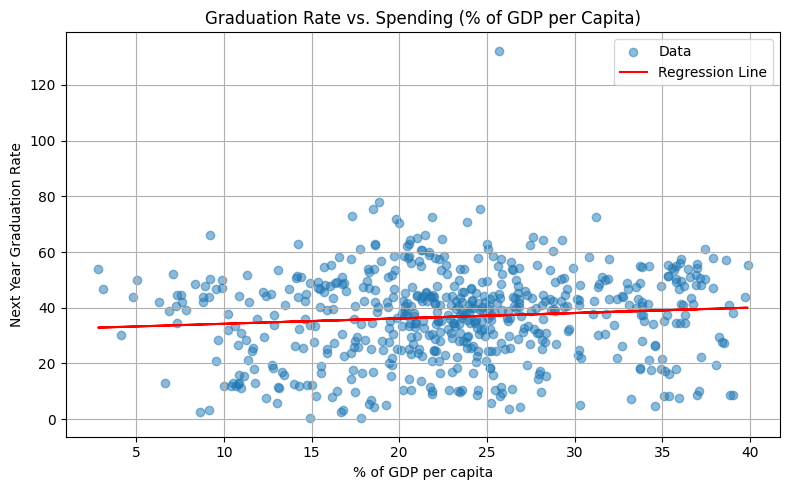

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

#load and filter data
df = pd.read_csv("Final_Combined_Cleaned_Dataset.csv")
df = df[df["Spending"] <= 40]  #remove outliers above 40%

#pivot to wide format: each year becomes a column
wide_df = df.pivot(index="geoUnit", columns="year", values=["Spending", "GraduationRate"])
wide_df.columns = [f"{col[1]}_{col[0]}" for col in wide_df.columns]
wide_df.reset_index(inplace=True)

#construct N+1 training data
rows = []
for _, row in wide_df.iterrows():
    for year in range(2000, 2023):
        y, y_next = str(year), str(year + 1)
        spend_col = f"{y}_Spending"
        grad_col = f"{y_next}_GraduationRate"
        if spend_col in row and grad_col in row:
            if pd.notna(row[spend_col]) and pd.notna(row[grad_col]):
                rows.append({
                    "Country": row["geoUnit"],
                    "Year": year,
                    "SpendingRate": row[spend_col],
                    "GraduationRate_Nplus1": row[grad_col]
                })

df_nplus1 = pd.DataFrame(rows)

#train linear regression
X = df_nplus1[["SpendingRate"]]
y = df_nplus1["GraduationRate_Nplus1"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

#print model stats
print(f"Samples Used: {len(df_nplus1)}")
print(f"R² Score: {r2_score(y, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
print(f"Coefficient: {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

#plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.title("Graduation Rate vs. Spending (% of GDP per Capita)")
plt.xlabel("% of GDP per capita")
plt.ylabel("Next Year Graduation Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
"""MULTIPLE LINEAR REGRESSION to Predict Government Expenditure as GDP % on Education"""
# For countries USA, Germany, and Argentina
# Between years 2010-2019

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import altair as alt
import pandas as pd

# Load datasets and rename value columns
regression_pop_growth = pd.read_csv("data/population_growth.csv")
regression_pop_growth.rename(columns={'value': 'Population Percent Growth'}, inplace=True)
regression_pop_growth = regression_pop_growth[['geoUnit', 'year', 'Population Percent Growth']]

regression_sec_ed_completion = pd.read_csv("data/secondary_ed_completion.csv")
regression_sec_ed_completion.rename(columns={'value': 'Secondary Education Completion'}, inplace=True)
regression_sec_ed_completion = regression_sec_ed_completion[['geoUnit', 'year', 'Secondary Education Completion']]

regression_gdp_rate = pd.read_csv("data/gdp_rate.csv")
regression_gdp_rate.rename(columns={'value': 'GDP Percent Increase on Education'}, inplace=True)
regression_gdp_rate = regression_gdp_rate[['geoUnit', 'year', 'GDP Percent Increase on Education']]

# Merge all datasets on 'geoUnit' and 'year'
df = regression_gdp_rate.merge(regression_pop_growth, on=["geoUnit", "year"])
df = df.merge(regression_sec_ed_completion, on=["geoUnit", "year"])

# Rename column names
df.rename(columns={'geoUnit': 'Country', 'year': 'Year'}, inplace=True)

# Selecting years 2010-2019 and countries USA, Germany, and Argentina
filtered_countries = df[df['Country'].isin(['USA', 'DEU', 'ARG'])]
filtered_years = filtered_countries[filtered_countries['Year'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]
final_regression_df = filtered_years

# Display data frame we will be doing Multiple Linear Regression with
final_regression_df

,Country,Year,GDP Percent Increase on Education,Population Percent Growth,Secondary Education Completion
16,ARG,2010,5.019710,0.25558,56.831020
17,ARG,2011,5.290630,1.15306,62.800000
18,ARG,2012,5.345830,1.13691,62.500000
19,ARG,2013,5.436610,1.11911,62.300000
20,ARG,2014,5.361440,1.09946,62.200000
21,ARG,2016,5.545490,1.05718,62.700000
22,ARG,2017,5.454320,1.03713,63.000000
23,ARG,2018,4.877740,1.01581,63.400000
24,ARG,2019,4.771650,0.99340,63.800000
281,DEU,2010,5.095880,-0.15320,79.560000


In [ ]:
# Function to generate a plot for each individual variable
# Colored by country
# Variable vs. Year
def plot_variable_trends(df, variable_name):
    """
    Plots a line chart for a specified variable across different countries and years.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data for countries, years, and variables.
    variable_name (str): The specific variable to plot (e.g., 'GDP Percent Increase on Education',
                          'Population Percent Growth', 'Secondary Education Completion').

    Returns:
    alt.Chart: An Altair chart object for visualization.
    """

    # Melt the DataFrame to prepare data for plot
    long_df = df.melt(id_vars=['Country', 'Year'], # Country and year
                      value_vars=[variable_name],  # Select only variable of interest
                      var_name='Variable',
                      value_name='Value')

    # Create the line plot with Year on x-axis and the selected variable on the y-axis
    chart = alt.Chart(long_df).mark_line().encode(
        x='Year:O',  # Order (categorical) scale for the year
        y=alt.Y('Value:Q', title=variable_name),  # Set y-axis label to the selected variable
        color='Country:N',  # Different colors for each country
        tooltip=['Country', 'Year', 'Value']  # Tooltip to show details when hovering over points
    ).properties(
        title=f"Trends of {variable_name} Over Time by Country"
    )

    # Display chart
    return chart

# Plot GDP Percent Increase on Education
plot_variable_trends(final_regression_df, 'GDP Percent Increase on Education').show()

# Plot Population Percent Growth
plot_variable_trends(final_regression_df, 'Population Percent Growth').show()

# Plot Secondary Education Completion
plot_variable_trends(final_regression_df, 'Secondary Education Completion').show()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [ ]:
# Feature and target variables
# Our features are Population Percent Growth, Secondary Education Completion, and Year
X = final_regression_df[['Population Percent Growth', 'Secondary Education Completion', 'Year']]
# Our target is GDP Percent Increase on Education
y = final_regression_df['GDP Percent Increase on Education']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate model using MSE and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Data frame to create a visualization using Altair
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Altair scatter plot for Actual vs Predicted
chart = alt.Chart(result_df).mark_circle(size=60).encode(
    x='Actual',
    y='Predicted',
    tooltip=['Actual', 'Predicted']
).properties(
    title='Actual vs Predicted: GDP Percent Increase on Education'
)

# Display chart
chart.show()

Mean Squared Error (MSE): 0.10114718354372006
R² Score: -8.30123666292312


alt.Chart(...)